# Notebook to Create ML Model
Predict penguin species given measurements of the bill, flippers, and body mass, and knowledge about penguin's sex and location

In [1]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [2]:
# Load dataset as dataframe
penguin_df = pd.read_csv('penguins.csv')
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Dropping null values
penguin_df.dropna(inplace = True)
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [4]:
# Distribution of Personal Loan column
penguin_df['species'].value_counts(normalize = True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

In [5]:
# Output column for prediction
output = penguin_df['species'] 

# Input features (excluding year column)
features = penguin_df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']] 

# One-hot-encoding for categorical variables
features = pd.get_dummies(features) 

# Factorize output feature (convert from string to number)
output, uniques = pd.factorize(output) 

In [6]:
features.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [7]:
print(uniques)
print(output)

Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

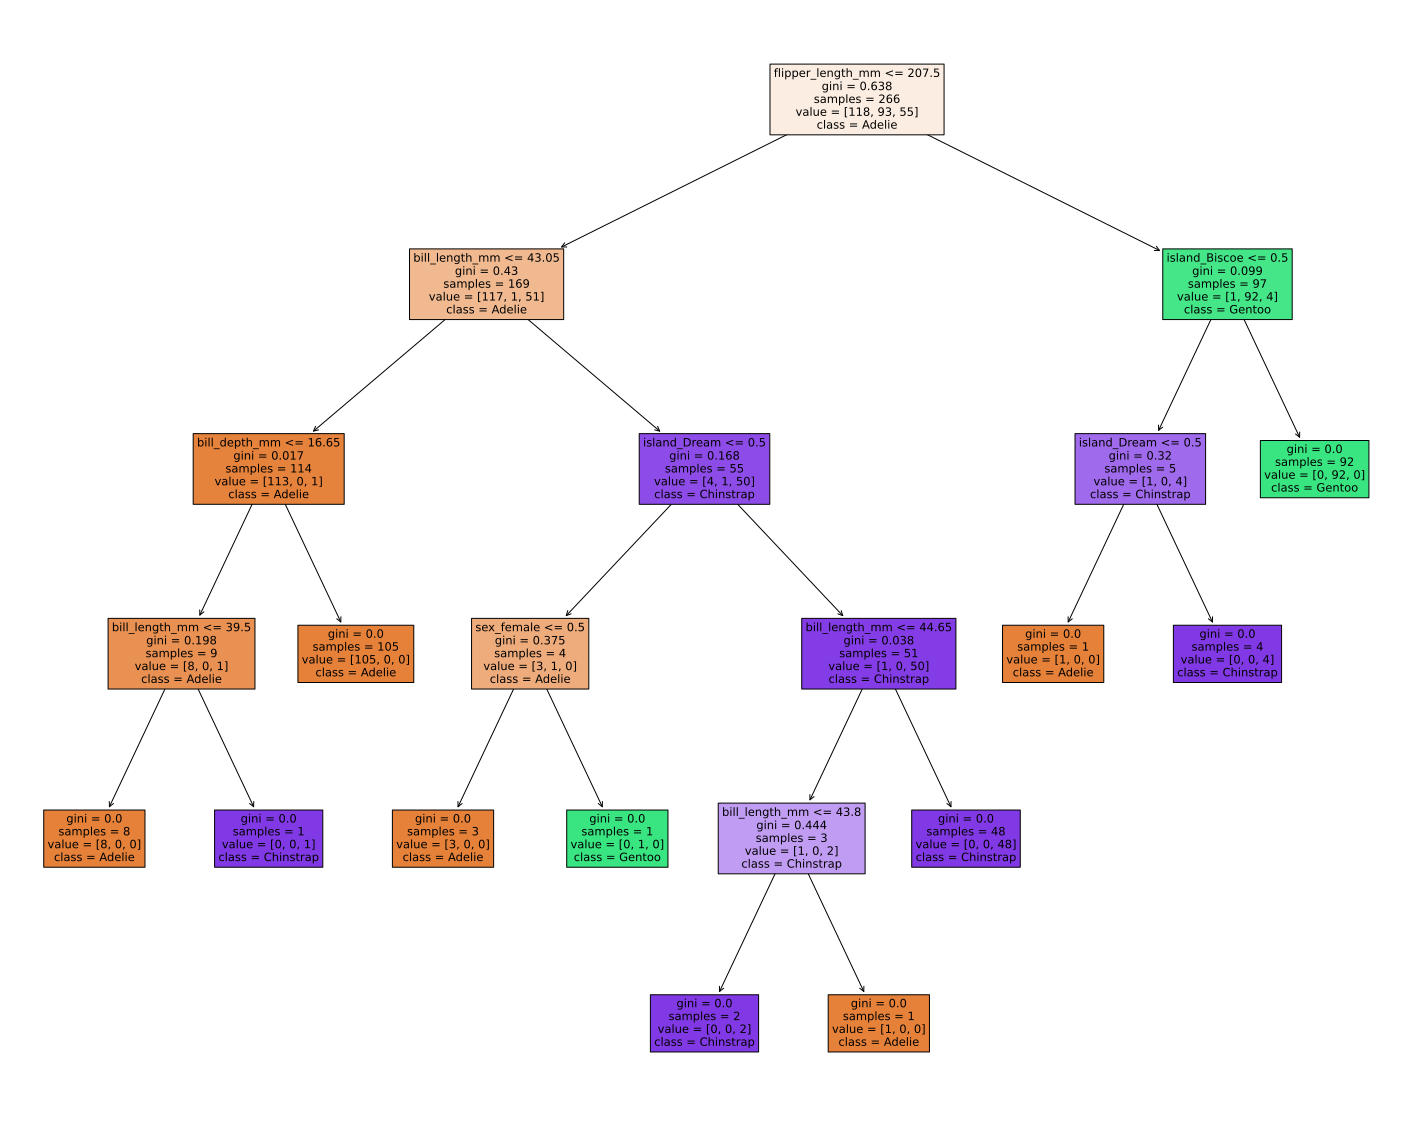

In [28]:
# Visualizing trained decision tree model
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = list(train_X.columns),
                   class_names = list(uniques),
                   filled = True)

# Saving Decision Tree
# fig.savefig("penguin_decision_tree.pdf", bbox_inches='tight')

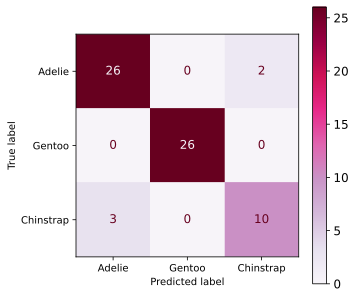

In [15]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = uniques)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

In [20]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df
# report_df.to_csv('class_report.csv') 

,0,1,2,accuracy,macro avg,weighted avg
precision,0.896552,1.0,0.833333,0.925373,0.909962,0.924430
recall,0.928571,1.0,0.769231,0.925373,0.899267,0.925373
f1-score,0.912281,1.0,0.800000,0.925373,0.904094,0.924535
support,28.000000,26.0,13.000000,0.925373,67.000000,67.000000


In [17]:
# Access specific items
macro_f1 = report_df.loc['f1-score', 'macro avg']
macro_f1

0.904093567251462

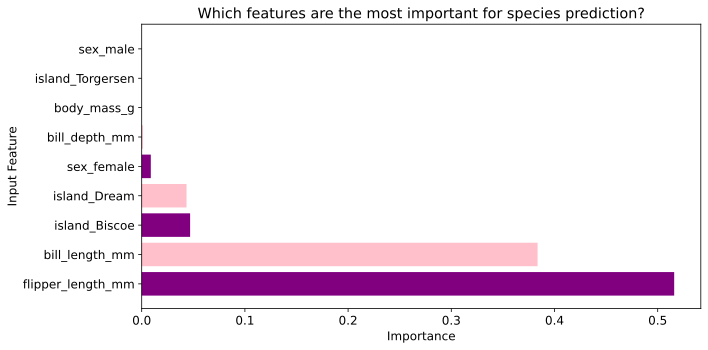

In [18]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout();


### Save your prediction model and load it later to make predictions

**Using Pickle**

 <img src="https://d33wubrfki0l68.cloudfront.net/0f66116c250285870171e38f309161bafc25f06b/dbd4c/assets/images/posts/pickled-cabbage.jpg" width="350" style="float: center"/>

**Pickle** is a useful Python tool that allows you to save your ML models, to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models.

In [24]:
# First pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_penguin.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 

# Second pickle file: uniques variable, which maps the 
# factorized output variable to the species name that we recognize
output_pickle = open('output_penguin.pickle', 'wb') 
pickle.dump(uniques, output_pickle) 
output_pickle.close() 